# Исследование для российской авиакомпании "F9"

Проанализируем спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали. 

# Изучение общей информации о файлах

Выведем полученные таблицы на экран:

In [1]:
import pandas as pd
flights_amount = pd.read_csv('/datasets/query_1.csv')
flights_amount

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Посмотрим на общую информацию о файле:

In [2]:
flights_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


*Таблица flights_amount(информация о количестве рейсов для каждой модели самолета в сентябре 2018г.) состоит из 8 строк и 2 столбцов. В предобработке данных не нуждается.*

Переходим к следующей таблице:

In [3]:
average_flights = pd.read_csv('/datasets/query_3.csv')
average_flights.sample(5)

,city,average_flights
40,Махачкала,3.290323
79,Тамбов,4.000000
16,Воронеж,2.000000
42,Мирный,6.290323
51,Нижнекамск,3.741935


Выведем общую информацию о файле:

In [4]:
average_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


*Таблица average_flights(информация о среднем количестве рейсов, прибывающих в конкретный город в сентябре 2018г.) содержит 101 строку и 2 столбца. Нужна замена типа данных на целочисленный в столбце 'average_flights' - среднее количество рейсов.*

Переходим к следующей таблице:

In [5]:
festival_flights = pd.read_csv('/datasets/query_last.csv')
festival_flights

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


Выведем общую информацию о файле:

In [6]:
festival_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


*Таблица festival_flights(информация о купленных билетах за неделю) состоит из 10 строк и 9 столбцов. В festival_name содержится категориальная переменная, в остальных - количественная. В столбцах festival_week и festival_name есть пропуски.*

Описание данных в столбцах таблицы:

-	model — модели самолета;

-	flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года;

-	city — города;

-	average_flights — среднее количество рейсов, прибывающих в город city за день в сентябре 2018 года;

-	week_number — номер недели;

-	ticket_amount — количество проданных билетов за неделю;

-	festival_week — есть ли на этой неделе фестиваль;

-	festival_name — название фестиваля




### Вывод:

Итак, получено три таблицы:

- flights_amount: информация о количестве рейсов для каждой модели самолета в сентябре 2018г.

- average_flights: информация о среднем количестве рейсов, прибывающих в город в сентябре 2018г.

- festival_flights: содержит информацию о фестивалях в г.Москва, номер недели, в которую был проведен фестиваль; а также количество проданных билетов за конкретную неделю с прибытием в г.Москва.

Переходим к предобработке данных.

# Предобработка данных

В столбце average_flights заменим тип данных на целочисленный:

In [7]:
average_flights['average_flights'] = average_flights['average_flights'].astype('int')

Проверим результат:

In [8]:
average_flights['average_flights'].dtype

dtype('int64')

Пропуски в столбцах festival_week и festival_name таблицы festival_flights(информация о фестивалях) заполнять не будем, т.к. заполненные строки в указанных выше столбцах означают, что именно в эти недели проходил в г.Москва конкретный фестиваль. Пропущенные значения, соответственно, означают что фестиваля не было. 

Значение NaN образовалось в результате запроса из баз данных.

# Исследовательский анализ

Выведем таблицу с количеством рейсов, прибывших в города России в сентябре 2018г.:

In [9]:
#Отсортируем данные в порядке убывания:
average_flights.sort_values(by = 'average_flights', ascending = False)

,city,average_flights
43,Москва,129
70,Санкт-Петербург,31
54,Новосибирск,17
20,Екатеринбург,11
33,Красноярск,11
...,...,...
21,Иваново,1
22,Ижевск,1
76,Стрежевой,1
49,Нефтеюганск,1


Построим для таблицы график:

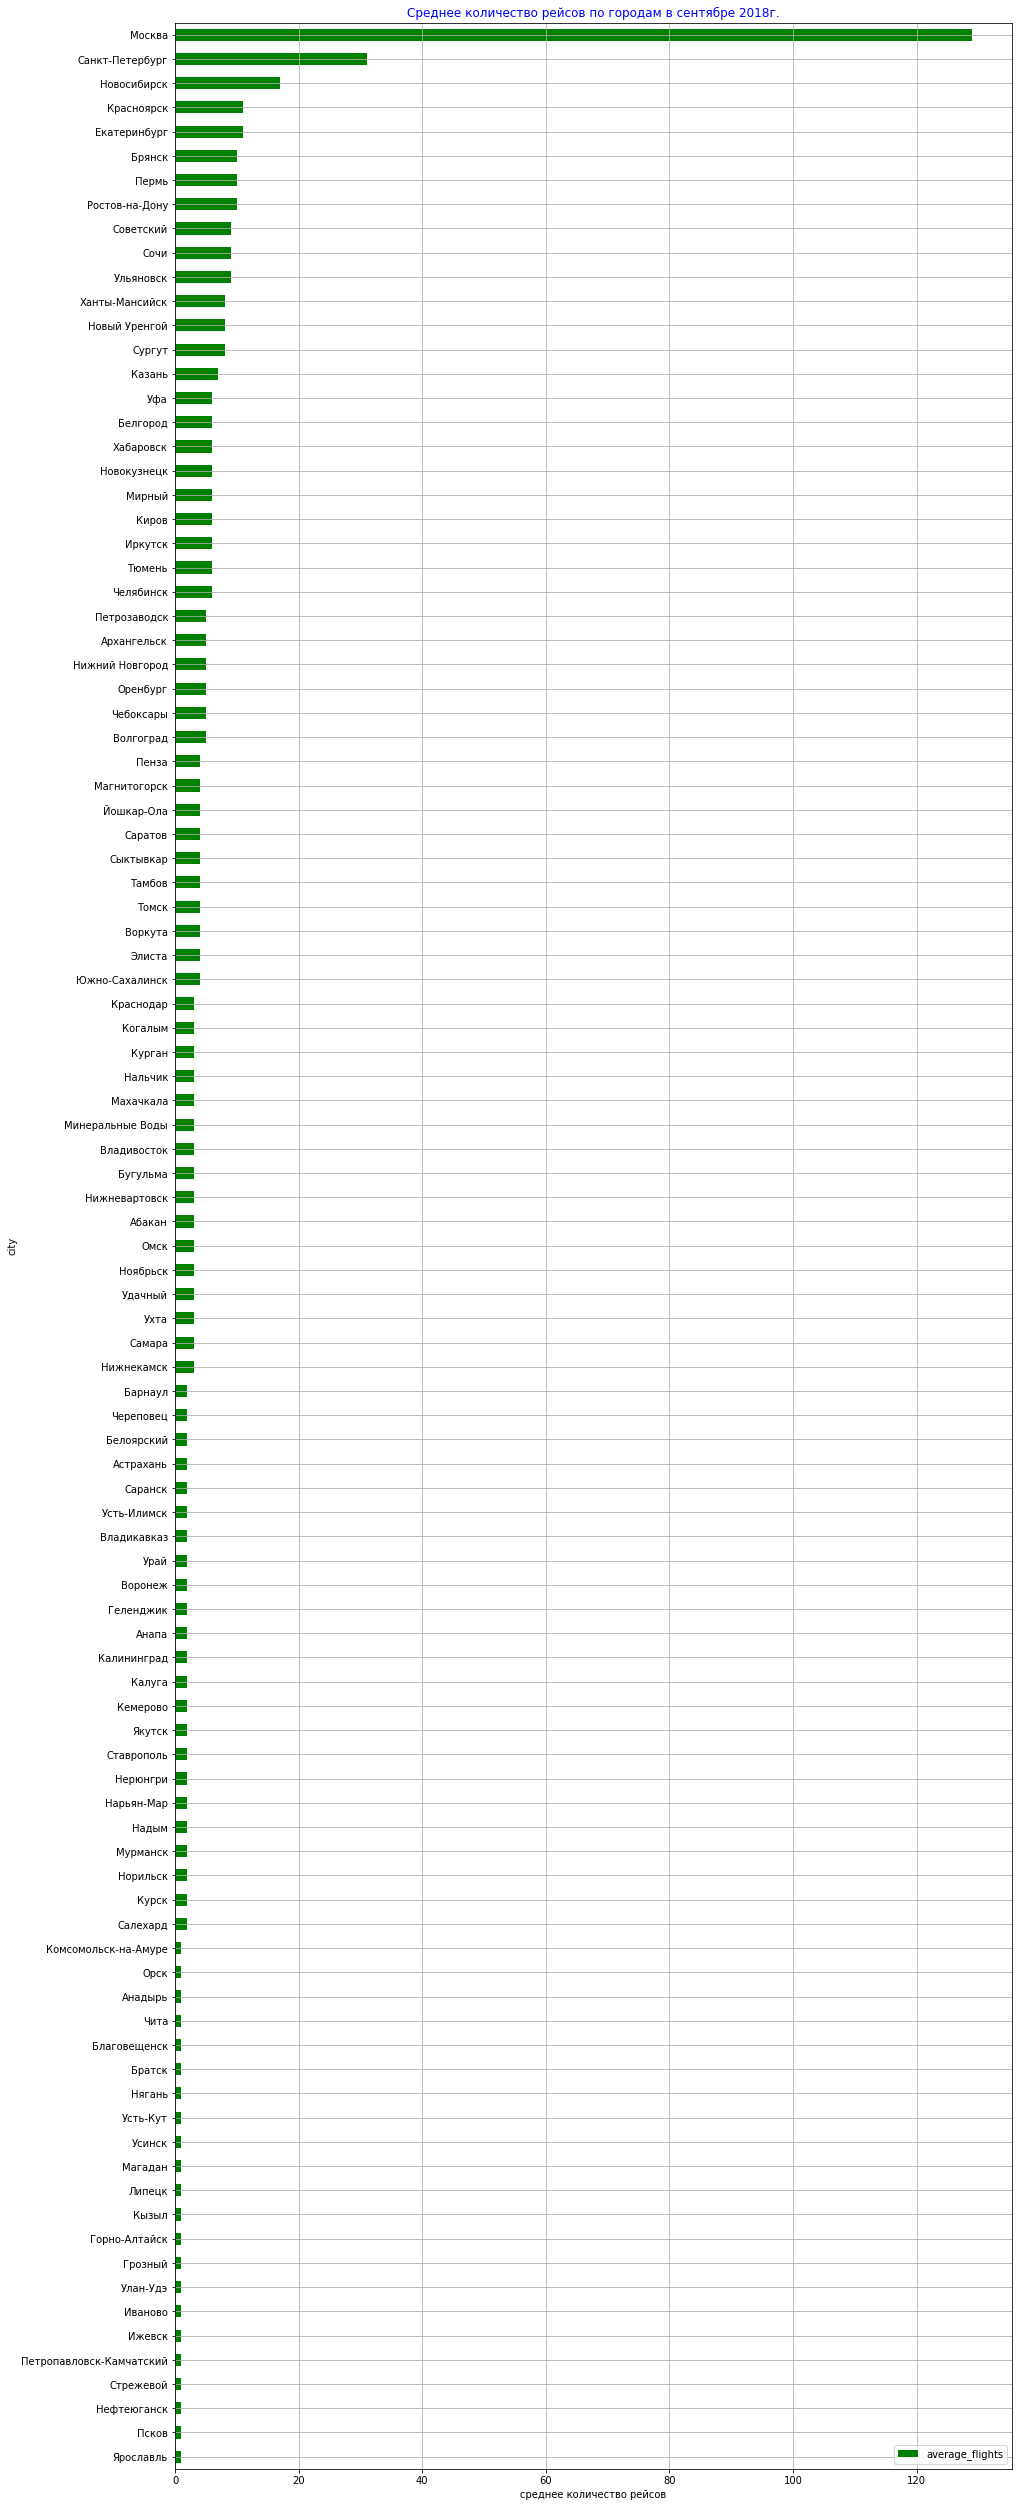

In [10]:
import matplotlib.pyplot as plt
average_flights.sort_values(by = 'average_flights').plot('city', kind = 'barh', figsize = (15, 45),
                                                                           color = 'green')
plt.title('Среднее количество рейсов по городам в сентябре 2018г.', color = 'blue')
plt.xlabel('среднее количество рейсов')
plt.grid()
plt.show()

Из графика видно, что больше всего рейсов (более 120) прибыло в г.Москва в сентябре 2018г. по сравнению с другими городами.
Есть города России где прибытие рейсов ~1 в день.

Выберем топ-10 городов с наибольшим количеством рейсов и построим график:

In [11]:
# Отсортируем таблицу average_flights в порядке убывания по количеству рейсов с помощью метода sort_values(), 
# перезапишем индексы с помощью reset_index()
# оставим топ-10 городов - сделаем срез с помощью .loc
average_flights_big = average_flights.sort_values(by = 'average_flights', 
                                                  ascending = False).reset_index(drop = True).loc[:10]
average_flights_big

,city,average_flights
0,Москва,129
1,Санкт-Петербург,31
2,Новосибирск,17
3,Екатеринбург,11
4,Красноярск,11
5,Пермь,10
6,Ростов-на-Дону,10
7,Брянск,10
8,Ульяновск,9
9,Советский,9


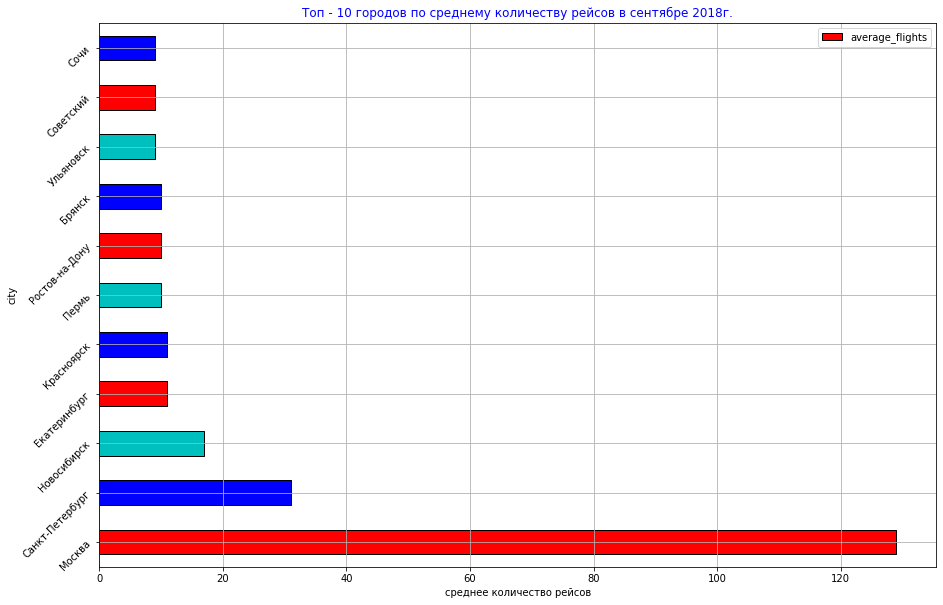

In [12]:
# построим график



#выбор цветов для столбцов average_flights_big['city']
colors = [['r', 'b', 'c'] for _ in average_flights_big['city']]

# построение столбчатой диаграммы:                                                                                                   
average_flights_big.plot('city', kind = 'barh', figsize = (15,10), color = colors, rot = 45, edgecolor = 'k')
plt.title('Топ - 10 городов по среднему количеству рейсов в сентябре 2018г.', color = 'blue')
plt.xlabel('среднее количество рейсов')
plt.grid()
plt.show()



Видим, что ~ в 4 раза количество прибывающих рейсов в г.Москва в сентябре 2018г. превышает среднее количество рейсов, прибывающих в г.СПб. и более чем в ~ 4 раза превышает в оставшихся городах.

Построим график, где будет изображено количество рейсов в сентябре 2018г. для каждой модели самолета: 

In [13]:
# Выведем таблицу flights_amount, отсортированную по убыванию данных в столбце 'flights_amount'
model = flights_amount.sort_values(by = 'flights_amount', ascending = False)
model

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


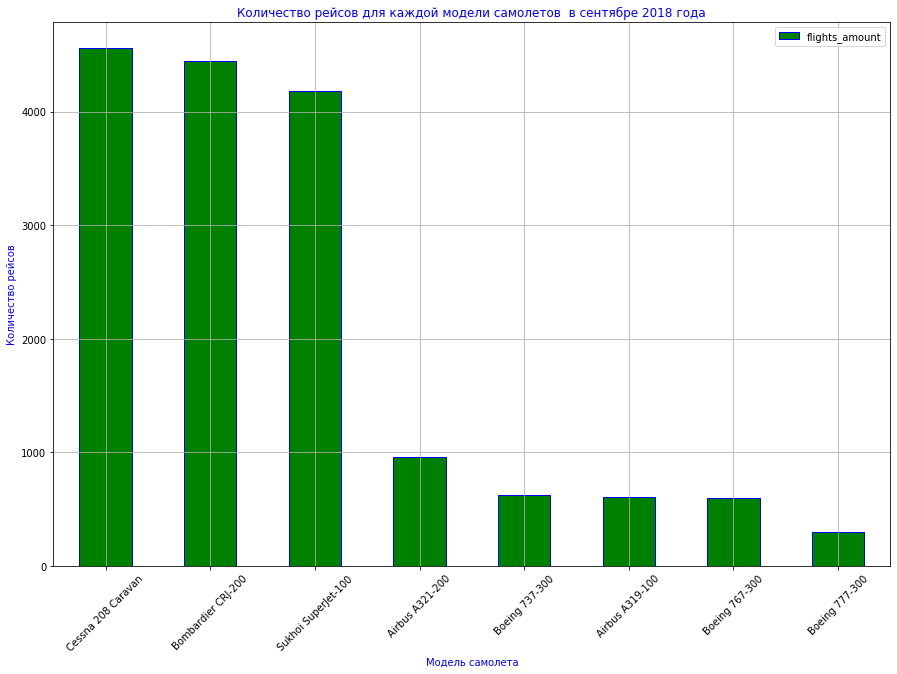

In [14]:
# Построим столбчатую диаграмму:
model.plot('model', kind = 'bar', color = 'green', figsize = (15,10), rot = 45, edgecolor = 'blue')
plt.title('Количество рейсов для каждой модели самолетов  в сентябре 2018 года', color = 'blue')
plt.ylabel('Количество рейсов', color = 'blue')
plt.xlabel('Модель самолета', color = 'blue')
plt.grid()
plt.show()

Видим, что более 4000 рейсов, выполнены для моделей самолетов: Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100.



Нам известно, что в сентябре 2018г. в Москве проходили фестивали. Проверим, связано ли такое количество прибывающих рейсов в г.Москва с фестивалями.

Выведем таблицу festival_flights, в которой отражена информация о проходивших фестивалях в г.Москва с 23.07.2018 по 30.09.2018гг. и количеством проданных билетов за конкретную неделю с прибытием в аэропорты столицы России.

In [15]:
festival_flights

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


Посчитаем среднее количество проданных билетов в г.Москва в недели когда проходил фестиваль и когда не было фестиваля.

In [16]:
# Среднее количество билетов проданных в г.Москва в недели когда не было фестивалей,
# Для этого сделаем нужный срез
festival_flights_no = festival_flights[festival_flights['festival_week'].isnull()]['ticket_amount'].mean()
festival_flights_no

51530.857142857145

Среднее количество билетов проданных в г.Москва в неделю когда не было фестивалей ~ 51531.

In [17]:
# Среднее количество билетов проданных в г.Москва в недели когда проходили фестивали,
# Для этого сделаем нужный срез
festival_list = [30, 31, 36]
festival_flights_yes = festival_flights.query('week_number == @festival_list')['ticket_amount'].mean()
festival_flights_yes 

48662.666666666664

Среднее количество билетов проданных в г.Москва в неделю когда проходили фестивали ~ 48663.

Посмотрим на распределение данных для среза  когда не было фестивалей в г.Москва: создадим график вероятности выборки данных по квантилям указанного теоретического распределения и с помощью его оценим нормально ли распределены данные: 

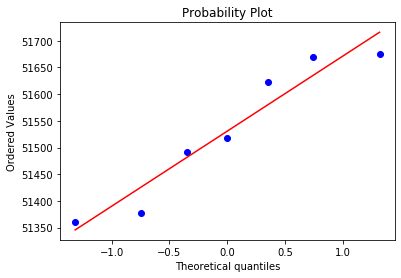

In [18]:
# сохраним срез(не проходил фестиваль):
festival_srez = festival_flights[festival_flights['festival_week'].isnull()]['ticket_amount']
# построим probplot:
from scipy import stats  # подключение нужной библиотеки 
_ = stats.probplot(festival_srez, plot = plt)

Выборка festival_srez очень мала: всего 7 единиц. Поэтому сложно определить насколько нормально распределены данные. Выборка, содержащая количество проданных билетов в г.Москва во время фестивалей еще меньше: всего 3 значения. Поэтому будем считать, что перед нами t- распределение Стьюдента.

Итак, сформулируем и проверим гипотезу: 

*в ходе исследования было получено среднее из выборки "спрос на билеты в недели сентября 2018г. когда фестивалей не было" ~ 51531 со стандартным отклонением от выборочного среднего ~ 131. А также было получено среднее из выборки "спрос на билеты во время фестивалей" ~ 48663 со стандартным отклонением ~ 4416. Можем ли мы считать, что средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время?*

Сформулируем нулевую гипотезу: среднее выборочное по выборке "спрос на билеты во время фестивалей" не отличается от выборочного среднего по выборке "спрос на билеты в обычные дни".

И альтернативную гипотезу: средние выборочные двух выборок различны.

Решение:

Рассмотрим альтернативный способ проверки гипотезы, а именно: рассчитаем 95% доверительный интервал для выборок. Если доверительные интервалы пересекутся, то мы не сможем отвергнуть нулевую гипотезу. Если не пересекутся - у нас появятся основания для того чтобы отвергнуть нулевую гипотезу и принять альтернативную. Другими словами, различия между средними двух выборок имеют место быть, когда их доверительные интервалы не пересекаются.

Рассчитаем доверительные интервалы по формуле: X - (t *se) < X < X + (t * se), 

где X - выборочное среднее, 

t-критерий Стьюдента. Его значение для вероятности 0,95 мы возьмем из  [Таблицы](https://www.mathelp.spb.ru/book2/tv12.htm), 

se - ошибка среднего, которую можно найти по формуле: se = std /  sqrt(n). Где std - стандартное отклонение, n - количество элементов выборки, sqrt(n) - корень квадратный из n     

Вычислим доверительный интервал для выборки "спрос на билеты в обычные дни":

In [19]:
import numpy as np

mean = festival_srez.mean()# вычислим среднее
se = np.std(festival_srez, ddof = 1) / np.sqrt(len(festival_srez)) # вычислим ошибку среднего
# вычислим значение левой границы:
left = mean - (2.45 * se) # в выборке 7 элементов, поэтому t-критерий Стьюдента для вероятности 95% ~ 2.45; 
right = mean + (2.45 * se) # вычислим значение правой границы
# вывод на экран
print('Выборочное среднее = {:.0f}'.format(mean))
print('Ошибка среднего = {:.0f}'.format(se))
print('Левая граница доверительного интервала: {:.0f}'.format(left))
print('Правая граница доверительного интервала: {:.0f}'.format(right))

Выборочное среднее = 51531
Ошибка среднего = 49
Левая граница доверительного интервала: 51410
Правая граница доверительного интервала: 51652


В итоге получили, что 95% доверительный интервал при выборочном среднем ~51531 c ошибкой среднего ~ 49: 51410 < X < 51652;

Сейчас вычислим доверительный интервал для выборки "спрос на билеты в дни фестиваля":

In [20]:
# сохраним нужный нам срез данных в переменную _:
_ = festival_flights.query('week_number == @festival_list')['ticket_amount']
mean = _.mean() # вычислим среднее
se = np.std(_, ddof = 1) / np.sqrt(len(_)) # вычислим ошибку среднего
# вычислим значение левой границы:
left = mean - (4.3 * se) # в выборке 3 элемента, поэтому t-критерий Стьюдента для вероятности 95% ~ 4.3
right = mean + (4.3 * se) # вычислим значение правой границы
# вывод на экран
print('Выборочное среднее = {:.0f}'.format(mean))
print('Ошибка среднего = {:.0f}'.format(se))
print('Левая граница доверительного интервала: {:.0f}'.format(left))
print('Правая граница доверительного интервала: {:.0f}'.format(right))

Выборочное среднее = 48663
Ошибка среднего = 2549
Левая граница доверительного интервала: 37700
Правая граница доверительного интервала: 59625


В итоге получили, что 95% доверительный интервал при выборочном среднем ~48663 c ошибкой среднего ~ 2549: 37700 < X < 59625;

Итак, мы получили что доверительные интервалы по выборкам пересекаются. А это означает, что у нас нет оснований для того чтобы отвергнуть нулевую гипотезу. Следовательно, мы можем предположить, что средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время.



# Общий вывод:

Итак, в ходе работы было установлено, что среднее количество прибывающих рейсов в день в сентябре 2018г. в г.Москва ~ в 4 раза больше по сравнению со средним количеством рейсов прибывающих в другие города России. Различия хорошо видно в таблице "Топ-10 городов с наибольшим количеством рейсов":

In [21]:
average_flights_big

,city,average_flights
0,Москва,129
1,Санкт-Петербург,31
2,Новосибирск,17
3,Екатеринбург,11
4,Красноярск,11
5,Пермь,10
6,Ростов-на-Дону,10
7,Брянск,10
8,Ульяновск,9
9,Советский,9


Также были установлены недели, в которые проходили фестивали в г.Москве с 23.07.2018 по 30.09.2018гг.: это 30, 31 и 36 неделя.

In [22]:
festival_flights.query('week_number == @festival_list')

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
6,36,51386,36.0,Видфест


Из таблицы видно сколько было продано билетов в г.Москва в указанную неделю. Среднее количество проданных билетов ~ 48663.

А вот таблица, в которой указано количество проданных билетов в г.Москва в период с 23.07.2018 по 30.09.2018гг. когда фестивалей не было:

In [23]:
festival_flights = festival_flights[festival_flights['festival_week'].isnull()]
festival_flights['festival_week'] = festival_flights['festival_week'].fillna(value = '-')
festival_flights['festival_name'] = festival_flights['festival_name'].fillna('did not pass')
festival_flights

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,week_number,ticket_amount,festival_week,festival_name
2,32,51675,-,did not pass
3,33,51378,-,did not pass
4,34,51492,-,did not pass
5,35,51360,-,did not pass
7,37,51670,-,did not pass
8,38,51518,-,did not pass
9,39,51623,-,did not pass


Продажи билетов в среднем составили ~ 51531 в неделю.

Была выдвинута и проверена гипотеза  о том, что средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время.

Гипотеза была проверена с помощью альтернативного метода, а именно расчета 95% доверительного интервала для двух выборок. 
В итоге получили следующие интервалы:

- для выборки "спрос на билеты в дни фестиваля" 95% доверительный интервал при выборочном среднем ~48663 c ошибкой среднего ~ 2549: 37700 < X < 59625

- для выборки "спрос на билеты в обычные дни" 95% доверительный интервал при выборочном среднем ~51531 c ошибкой среднего ~ 49: 51410 < X < 51652

Как видим, доверительные интервалы пересекаются. Следовательно, мы можем предположить, что различий между средними двух выборок нет. Различия имели место быть, если бы доверительные интервалы не пересекались.

Значит, мы можем с 95% вероятностью предположить, что спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время.